In [12]:
# --- Basic Imports ---
import os
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

# --- Directory Paths ---
BASE_DIR = "../data"
TRAIN_DIR = os.path.join(BASE_DIR, "Training")
TEST_DIR = os.path.join(BASE_DIR, "Testing")

# --- Classes ---
CLASSES = ["glioma", "meningioma", "pituitary", "notumor"]

# --- For reproducibility ---
random.seed(42)
np.random.seed(42)

print("Environment set up successfully.")

Environment set up successfully.


In [13]:
print("Dataset Overview:\n")
for c in CLASSES:
    n_train = len(os.listdir(os.path.join(TRAIN_DIR, c)))
    n_test = len(os.listdir(os.path.join(TEST_DIR, c)))
    print(f"{c:<12} | Train: {n_train:4d}  | Test: {n_test:4d}")

Dataset Overview:

glioma       | Train: 1321  | Test:  300
meningioma   | Train: 1339  | Test:  306
pituitary    | Train: 1457  | Test:  300
notumor      | Train: 1595  | Test:  405


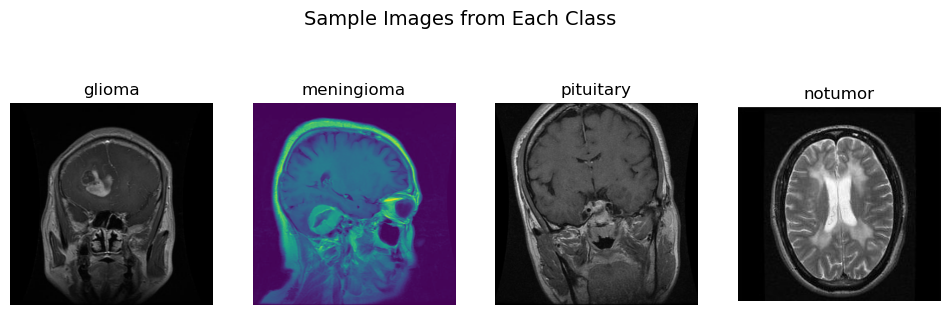

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i, c in enumerate(CLASSES):
    img_name = random.choice(os.listdir(os.path.join(TRAIN_DIR, c)))
    img_path = os.path.join(TRAIN_DIR, c, img_name)
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(c)
    axes[i].axis("off")
plt.suptitle("Sample Images from Each Class", fontsize=14)
plt.show()

            Width       Height
count  200.000000   200.000000
mean   451.080000   455.815000
std    125.402522   124.620593
min    150.000000   168.000000
25%    498.000000   509.250000
50%    512.000000   512.000000
75%    512.000000   512.000000
max    890.000000  1075.000000


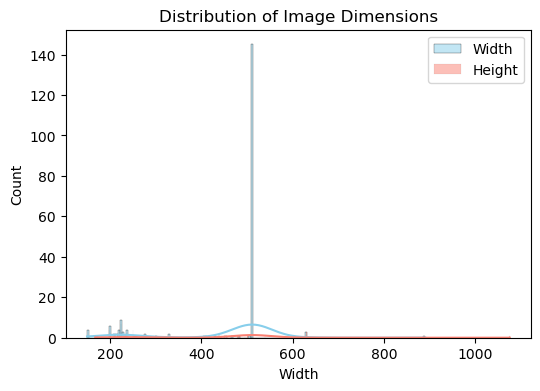

In [15]:
sizes = []
for c in CLASSES:
    image_dir = os.path.join(TRAIN_DIR, c)
    for img_name in random.sample(os.listdir(image_dir), min(50, len(os.listdir(image_dir)))):
        img = Image.open(os.path.join(image_dir, img_name))
        sizes.append(img.size)

# Convert to DataFrame
df_sizes = pd.DataFrame(sizes, columns=["Width", "Height"])
print(df_sizes.describe())

plt.figure(figsize=(6,4))
sns.histplot(df_sizes["Width"], color="skyblue", kde=True, label="Width")
sns.histplot(df_sizes["Height"], color="salmon", kde=True, label="Height")
plt.legend()
plt.title("Distribution of Image Dimensions")
plt.show()

In [19]:
SMALL_DATA_DIR = "../data_small"
TRAIN_SMALL = os.path.join(SMALL_DATA_DIR, "train")
TEST_SMALL = os.path.join(SMALL_DATA_DIR, "test")

def create_subset(src_dir, dest_dir, n=150):
    os.makedirs(dest_dir, exist_ok=True)
    for cls in CLASSES:
        src_cls = os.path.join(src_dir, cls)
        dest_cls = os.path.join(dest_dir, cls)
        os.makedirs(dest_cls, exist_ok=True)
        files = random.sample(os.listdir(src_cls), min(n, len(os.listdir(src_cls))))
        for f in tqdm(files, desc=f"Copying {cls}", ncols=80):
            shutil.copy(os.path.join(src_cls, f), os.path.join(dest_cls, f))

# Create Subset (Train + Test)
create_subset(TRAIN_DIR, TRAIN_SMALL, n=150)
create_subset(TEST_DIR, TEST_SMALL, n=50)
print("\nSmall dataset created successfully at '../data_small/'")

Copying notumor: 100%|████████████████████████| 50/50 [00:00<00:00, 5094.26it/s]


Small dataset created successfully at '../data_small/'


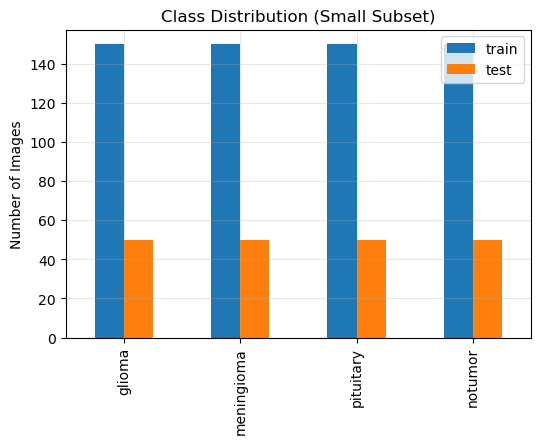

,train,test
glioma,150,50
meningioma,150,50
pituitary,150,50
notumor,150,50


In [20]:
subset_counts = {}
for split in ["train", "test"]:
    path = os.path.join(SMALL_DATA_DIR, split)
    subset_counts[split] = {cls: len(os.listdir(os.path.join(path, cls))) for cls in CLASSES}

subset_df = pd.DataFrame(subset_counts)
subset_df.plot(kind="bar", figsize=(6,4))
plt.title("Class Distribution (Small Subset)")
plt.ylabel("Number of Images")
plt.grid(alpha=0.3)
plt.show()

subset_df

In [21]:
metadata = []
for split in ["train", "test"]:
    for cls in CLASSES:
        path = os.path.join(SMALL_DATA_DIR, split, cls)
        for img_name in os.listdir(path):
            metadata.append({"split": split, "class": cls, "filename": img_name})

meta_df = pd.DataFrame(metadata)
meta_df.to_csv("../data_small/metadata.csv", index=False)
print("Metadata saved at '../data_small/metadata.csv'")
meta_df.head()

Metadata saved at '../data_small/metadata.csv'


,split,class,filename
0,train,glioma,Tr-gl_0217.jpg
1,train,glioma,Tr-gl_1055.jpg
2,train,glioma,Tr-gl_1096.jpg
3,train,glioma,Tr-gl_0809.jpg
4,train,glioma,Tr-gl_0148.jpg
